# DDA 3020 Assignment 3: Fully-Connected Neural Networks and CNN

Before we start, please put your name and ID in following format:

Firstname LASTNAME, #00000000   //  e.g.) Justin JOHNSON, #12345678



# Your Answer

Xin Cao, #120040062

# Overview

In this exercise, we are going to build a **fully-connected neural network** and a **convolutional neural network** from scratch using **numpy** package.

For **Fully-connected Neural Network**, you need to implement both forward and backward part to train your model and update the parameters.

For **Convolutional Neural Network**, you only need to implement the forward part, including `convolutional layers`, `max_pooling` and `fully-connected layers`. Functions of implementing backpropagation are given. Please check the input requirements for those functions, especially pay attention to the dimension.

Please follow the guidance and finish the **<font color="green">[To Do]</font>** and **<font color="red">[Task]</font>** part. Please feel free to define your own functions or modify the functions given if needed. No writing report is required and you will get the mark if the whole process and results are reasonable.

If you meet any package or memory issues that can't be solved, feel free to use this colab script to finish your task (remember to copy your own one instead of modifying this colab script directly) : https://colab.research.google.com/drive/1AdGyiVYosU2uMBQ9ahx5B7ZOmH8zEQg_?usp=drive_link

# Set Up Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fully-connected Neural Network

# 1.1 Loading Datasets

In this assignment, we mainly adopt the FashionMnist dataset to train our network. You will be given two csv files: **fashion-mnist_train.csv; fashion-mnist_test.csv**, containing 60000 and 10000 samples each. Each sample is a 28 * 28 grayscale image. In the csv file, each row represents a sample with dimension 1 * 784 (28*28). The first step of this assignment is loading our data. Please run the below cells and a visualization code is also given.

In [2]:
# run it only when you use colab to do this assignment
# no need to run it if you do this assignment locally
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [3]:
mnist_train = pd.read_csv('fashion-mnist_train.csv') # change the path to your own path
mnist_test = pd.read_csv('fashion-mnist_test.csv') # change the path to your own path

In [4]:
# check the shape of of the training data
print(mnist_train.shape)

(60000, 785)


In [5]:
# convert the dataset into training set and testing set
# for each pixel, the purpose of dividing it by 255 is to scale its value between 0 and 1 since the maximun value is 255
# for testset, since its label is a number, we first transform it into one-hot vector


X_train, Y_train = mnist_train.drop('label',axis=1)/255, mnist_train['label']
X_test, Y_test = mnist_test.drop('label',axis=1)/255, mnist_test['label']
Y_train, Y_test = pd.get_dummies(Y_train),pd.get_dummies(Y_test)

# you can check the first 10 samples of the training set
X_train.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.019608,0.015686,0.019608,0.019608,0.011765,0.019608,0.023529,...,0.027451,0.031373,0.027451,0.015686,0.011765,0.027451,0.019608,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.054902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.011765,0.007843,0.000000,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.796078,0.839216,0.650980,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [6]:
# here is a function of reshaping the 1*784 vector into 28*28 matrix (the original format of a grayscale image)
def reshape_data(X_train, X_test):
  train_size, test_size = X_train.shape[0], X_test.shape[0] # get the number of train set samples and test set samples
  reshape_train, reshape_test = np.transpose(X_train,(1,0)), np.transpose(X_test,(1,0)) # transpose the samples to make the features of every sample listed in one row
  # reshape to 28*28*1, 1 is the number of channels, grey image only has 1 channel
  reshape_train, reshape_test = reshape_train.reshape((28,28,1,train_size)), reshape_test.reshape((28,28,1,test_size)) 
  # reshape the sampls' dimension, make the  number of samples be the first dimension
  # fit in the input format of CNN: (batch_size, height, widths, channels)
  return np.transpose(reshape_train,(3,0,1,2)), np.transpose(reshape_test,(3,0,1,2))

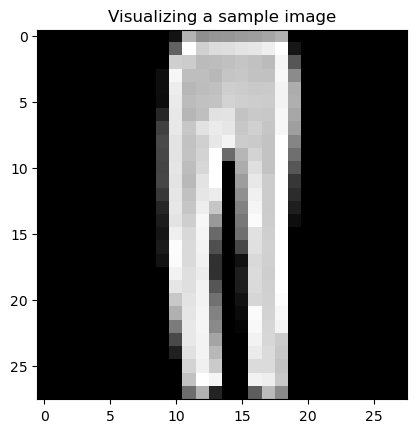

In [76]:
# here is a visualization cell that you can check the data sample from FashionMnist

x_train_sample, x_test_sample = reshape_data(X_train.values, X_test.values) # change the label of training set and testing set to format that CNN can accept
y_train_sample, y_test_sample = Y_train.values, Y_test.values # extract the laels of training set and testing set
# the format of X_train_sample: (batch_size, height, widths, channels), batch_size = number of samples
# get the first sample of training set, get all lines, columns and channels
#  the sample data is 28*28*1 tensor, squeeze() drop out the dimension=1 axis
# get a 28*28 2-dimension array, which is a grey image
sample_image = x_train_sample[999,:, :, :].squeeze() 

# plot the figure
plt.imshow(sample_image, cmap='gray')
plt.title("Visualizing a sample image")
plt.show()

In [67]:
y_test_sample

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False]])

# 1.2 Implement Fully-connected Neural Network

In this exercise, we will implement a simple **three layer fully-connected neural network** from scratch using only **numpy** package. The NN contains one input layer with 784 nodes (dimension of the input data), one hidden layer with 128 nodes, and one output layer with 10 nodes (10 types of labels). For the first two layers, we will use `relu` as our activation function. The output layer will use `softmax` activation function. The loss for this multi-label prediction task is chosen as softmax-cross-entropy



Firstly, we initialize all the parameters using the given functions. We provide an example of using this function. You can modify the function if needed (like changing the dimension etc.).

In [8]:
def initialize_parameters(layer_dims):
    '''
    initialize all the parameters, including weights and bias

    Inputs:
    - layer_dims: a list containing the number of nodes in each layer

    Example:
    - if you want to build a two layer neural network
    - the number of nodes in each layer is 20, 10
    - then use the function like: para = initialize_parameters([20,10])
    - para['W1'] is the weight matrix from layer 1 to layer 2 with dimension (10 * 20)
    - you can modify the output dimension if you need

    '''

    parameters = {} # create an empty dictionary to store all the parameters
    L = len(layer_dims) # get how many layer the neural network has

    # iterate from layer 1 to layer L-1 to initialize the weight and bias of every layer
    # layer 0 (input layer) doesn't have  bias and weight, just transfer parameter to next layer, so no need to initialize parameter
    # layer L (output layer) doesn't need initialization, because its parameters are determined by our task
    for l in range(1, L): 
        # save the weight matrix from current layer to next layer to parameter dictionary
        # W+str(l) is the key of dictionary
        # convert the integer l to string, to combine with w
        # np.random.randn() will randomly create a (a,b) array from normal distrbution
        # the (a,b) is a random array containing: a: current layer node number, b:last layer node number
        # 0.01: make the weight to a small range, contribute to stable training process
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        # create an all-zero array of (current layer node number, 1) size
        # represent the initialized bias are all zero
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

    return parameters

# 1.2.1 Activation functions and Loss functions

In this section, you will implement different functions, including `relu`, `softmax` and `cross entropy loss`. The formulas are listed below for reference.

---
*   $\text{ReLU}(z) = \max(0, z)$ \\
*   $\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$
*   $L = -\sum_{c=1}^{K} y_c \log(\hat{y}_c)$, where $y_c$ is the ground truth labels, $\hat{y}_c$ is the prediced labels



---

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below three functions.



In [9]:
def relu(Z):
  '''
  the ReLU activation function

  Inputs:
  - Z: the computed results before activation (e.g. WX+b)

  Outputs:
  - A: the result after activation

  '''
  # compare every element of z with 0, if >0, output the element itself, otherwise output 0
  A = np.maximum(0, Z)

  return A


def softmax(Z):

  A = np.exp(Z) / sum(np.exp(Z))

  return A


def compute_loss(A, Y):

  '''
  the softmax activation function

  Inputs:
  - A: the output result after softmax, the dimension is [10, batch_size]
  - Each row of A is a probability vector, A[0,0] represents the probability of the first sample belonging to label 0
  - Y: the groundtruth label, the dimension is [10, batch_size]

  Outputs:
  - L: the computed loss

  '''
  # shape[1] is Y's second dimension: batch size
  # dividing by batch size make the total loss become average loss between every sample
  L = - np.sum(Y * np.log(A)) / Y.shape[1]

  return L



# 1.2.2 Forward Propagation

In this section, you need to implement the `forward_propagation` function. Each time you propagate from one layer to the next layer, two steps are needed:


1.   Multiply the values in the current nodes with the weight matrix and add the bias terms
2.   Use the activation function to activate the results

In our setting, we have three layers, so we need to propogate our training data twice to get the final prediction results.

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below function.



In [10]:
def forward_propagation(X, parameters):

    '''
    Inputs:
    - X: the training data, with dimension [784,batch_size]
    - parameters: a dictionary that contains all the parameters define

    Outputs:
    - A2: the result of the last layer
    - cache: a tuple that stores the propagation results for later backpropagation process

    '''
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']

    # Step 1: Compute the activations of the first layer
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)  # Apply ReLU activation function

    # Step 2: Compute the activations of the second layer
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)  # Apply softmax activation function

    # Store intermediate results for backpropagation
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    return A2, cache

# 1.2.3 Backpropagation

In this section, we will implement the backpropagation process by completing the `relu_derivative` and `backward_propagation` functions.

When doing the backpropagation, we mainly use chain rule to compute the gradient. Below is an example that helps you understand this process:

Suppose we have two layers, we have the input data $X$, weight matrix $W$, forward result (without activation) $Z$, activation function $σ$, forward result (after activation) $A$, ground truth label $Y$ and Loss $L(Y,A)$. And we have the below relationships:

$Z = WX$

$A = σ(Z)$

If you wanna compute the gradient of the weight matrix, the formula is:

$\frac{dL}{dW} = \frac{dL}{dA}\frac{dA}{dZ}\frac{dZ}{dW} = \frac{dL}{dA}\frac{dA}{dZ} × X$, and $\frac{dL}{dA}$, $\frac{dA}{dZ}$ can be directly computed according to your loss function and activation function.

When implement this function, recall that we have stored the forward result and parameters in the cache. Please fully use these infomation to do your backpropagation.

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below function.

In [11]:
def relu_derivative(Z):
    '''
    Inputs:
    - Z: the value before activation

    Outputs：
    - dZ： the derivative of relu function
    '''
    # copy z to dz
    dZ = Z > 0

    return dZ

def backward_propagation(parameters, cache, X, Y):
    '''
    Implement the backward propagation process for our 3 layer NN
    Here are several steps you need to do:
    1. dZ2: Compute the gradient of Cross Entropy Loss and Softmax Function
    2. dW2: Compute the gradient of the weight matrix from hidden layer to output layer
    3. db2: Compute the gradient of the bias term from hidden layer to output layer
    4. dA2: Compute the gradient of the ReLU activation
    ...

    Inputs:
    - paramters: a dictionary containing all the parameters
    - cache: a tuple that store all the forward propagation results
    - X: training data, dimension of [784, batch_size]
    - Y: ground truth label, dimension of [10, batch_size]

    Outputs:
    - grads: a dictionary containing all the computed gradients
    '''
    Z1, A1, W1, b1, Z2, A2, W2, b2 = cache # load the forward results and parameters from forward propagation

    dZ2, dW2, db2, dA2, dZ1, dW1, db1 = None, None, None, None, None, None, None

    m = Y.size
    dZ2 = A2 - Y  # Compute the gradient of Cross Entropy Loss and Softmax Function
    dW2 = 1 / m * dZ2.dot(A1.T)  # Compute the gradient of the weight matrix from hidden layer to output layer
    db2 = 1 / m * np.sum(dZ2) # Compute the gradient of the bias term from hidden layer to output layer

    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)  # Compute the gradient of the ReLU activation
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)


    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

# 1.2.4 Update Parameters

Now, we have finished the backward propagation and get all the computed gradients. We can use the computed gradients to update all the parameters using gradient descent methods.

In [12]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2  # number of layers

    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]

    return parameters

# 1.2.5 Training our NN

In the previous section, we successfully implement the `forward` and `backward` part of NN. Now we can combine all the elements together and train our neural network.

In real training process, we don't feed all the data into the neural network at one epoch. Instead, we divide the dataset into small batches and update the parameters using just a small batch of data each time. The introduction of small bacth can reduce the memory load and increase the randomness, which can facilitate the training process and increase the generalization capability of our model. Below we provide two functions that can devide the training set and testing set into small batches.

In [13]:
def create_train_batches(X, Y, batch_size):
    '''
    Inputs:
    - X: training data, dimension [784, 60000]
    - Y: ground truth label. dimension [10, 60000]
    - batch_size: the size of each batch

    Outputs:
    - mini_batches: a list containing all the data divided into different batches
    '''
    m = X.shape[1]  # number of data; (60000)
    mini_batches = [] # create an empty list to store devided small batches data

    # shuffle all the data
    # mess up the order of the batches data to increase the randomness of data
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]

    # divide the data into batch
    num_complete_minibatches = m // batch_size
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*batch_size : (k+1)*batch_size]
        mini_batch_Y = shuffled_Y[:, k*batch_size : (k+1)*batch_size]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    # deal with the last batch (may not equal to the batch_size)
    # the datasize may not be completely divided by batch_size
    # add the remaining small batch to mini batches
    if m % batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches*batch_size :]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*batch_size :]
        mini_batches.append((mini_batch_X, mini_batch_Y))

    return mini_batches

# similar to the first function, but for testing data there is no need to deal with the label data
def create_test_batches(X, batch_size):
    '''
    Inputs:
    - X: testing data, dimension [784, 10000]
    - batch_size: the size of each batch

    Outputs:
    - mini_batches: a list containing all the data divided into different batches
    '''
    mini_batches = []
    m = X.shape[1]  # number of data, (10000)
    n_batches = m // batch_size

    for i in range(n_batches):
        X_mini = X[:, i*batch_size:(i+1)*batch_size]
        mini_batches.append(X_mini)

    if m % batch_size != 0:
        X_mini = X[:, n_batches*batch_size:]
        mini_batches.append(X_mini)

    return mini_batches

Before training our NN, we need to define a `model_predict` function to predict the labels of the data samples, which can be further used to compute the prediction accuracy.

**Hint 1**: Since our data are seperated into small batches, you need to predict the labels of data in each batch and then concatenate them together to the final predictions

**Hint 2**: Recall that output result of our NN is a one-hot probability vector for each data sample. You should convert them into a single label

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below function.

In [14]:
def model_predict(X_test, parameters, batch_size):
    mini_batches = create_test_batches(X_test, batch_size)
    all_predictions = [] # a list containing the prediction result of each small batch

    for X_mini in mini_batches:
      # Forward propagation to get predictions
      # forward propragation function will output distribution of output layer and a useless cache value_
      A2, _ = forward_propagation(X_mini, parameters)
      # Convert one-hot probability vectors to single labels
      # along axis=0(dimension of batch) find the label whose probability is maximazed
      predictions = np.argmax(A2, 0)
      all_predictions.append(predictions)

    all_predictions = np.concatenate(all_predictions, axis=0)
    return all_predictions

Finally, we can train our NN. You should following the below training steps to train your NN for each small batch in each iteration :



*   Do the **Forward Propagation** to get the forward results
*   Compute the **Loss** based on the forward results
*   Do the **Backward Propagation** to compute all the gradients
*   Update all the parameters

After iteration all the small batches, you should calculate the accuracy for both training data and testing data in this iteration.

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below function.


In [15]:
# layers_dims: dimension of neural network layer
def train(X_train, Y_train, X_test, Y_test, layers_dims, learning_rate, num_iterations, batch_size):
    # initialize the parameters
    parameters = initialize_parameters(layers_dims)

    # training iterations
    for i in range(0, num_iterations):

        # create the small batches
        mini_batches = create_train_batches(X_train, Y_train, batch_size)

        for mini_batch in mini_batches:
            (mini_batch_X, mini_batch_Y) = mini_batch

            # Forward propagation to get forward results
            A2, cache = forward_propagation(mini_batch_X, parameters)
            
            # Compute loss
            cost = compute_loss(A2, mini_batch_Y)

            # Backward propagation to compute gradients
            grads = backward_propagation(parameters, cache, mini_batch_X, mini_batch_Y)

            # Update parameters
            parameters = update_parameters(parameters, grads, learning_rate)

        # accuracy of training
        all_predictions = model_predict(X_train, parameters, batch_size)
        train_labels = np.argmax(Y_train, axis=0)
        train_acc = np.mean(all_predictions == train_labels) # the portion of accurate(True)

        # predict
        all_predictions = model_predict(X_test, parameters, batch_size)
        test_labels = np.argmax(Y_test, axis=0)
        test_acc = np.mean(all_predictions == test_labels)

        # print cost and acc
        print ("Cost after iteration %i: %f | Training Accuracy: %f | Test Accuracy: %f" %(i+1, cost, train_acc, test_acc))

    return parameters

In [16]:
# run this script to train you NN

x_train = X_train.values.T # reshape it from [60000,784] into [784,60000], because every column represents a batch in NN
y_train = Y_train.values.T # make sure the shape of label data is consistent with input data shape
x_test = X_test.values.T
y_test = Y_test.values.T


para = train(x_train , y_train, x_test, y_test, layers_dims = [784,128,10], learning_rate = 0.05, num_iterations = 20, batch_size = 256)

Cost after iteration 1: 2.229989 | Training Accuracy: 0.373967 | Test Accuracy: 0.376000
Cost after iteration 2: 1.970875 | Training Accuracy: 0.413133 | Test Accuracy: 0.416200
Cost after iteration 3: 1.505368 | Training Accuracy: 0.507800 | Test Accuracy: 0.506300
Cost after iteration 4: 1.359002 | Training Accuracy: 0.592800 | Test Accuracy: 0.589300
Cost after iteration 5: 1.109903 | Training Accuracy: 0.638783 | Test Accuracy: 0.634000
Cost after iteration 6: 1.108957 | Training Accuracy: 0.684733 | Test Accuracy: 0.682100
Cost after iteration 7: 0.784727 | Training Accuracy: 0.710700 | Test Accuracy: 0.709100
Cost after iteration 8: 0.819733 | Training Accuracy: 0.723533 | Test Accuracy: 0.721600
Cost after iteration 9: 0.900604 | Training Accuracy: 0.730700 | Test Accuracy: 0.727000
Cost after iteration 10: 0.712111 | Training Accuracy: 0.731383 | Test Accuracy: 0.727000
Cost after iteration 11: 0.799665 | Training Accuracy: 0.738150 | Test Accuracy: 0.734900
Cost after iteratio

# Convolutional Neural Network

In this exercise, we are going to implement a convoutional neural network from scratch using numpy. The network structure is shown as below:

*   `conv_layer`: 32 2*2 convolutional kernels; stride = 1;
*   `max_pooling`: 2*2 pooling window; stride = 2;
*   `fully-connected layers`: 3 two connected layers, each with n_flatten, 64, 10 nodes. `n_flatten` represents the dimension of the flattened pooling result

You will be asked to implement the `forward` part, including `conv_forward`, `pool_forward` and `linear_forward`. The backward part and training process are given. If needed, you can also modify those given functions to align with your implementation.

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part in the below function.

# 2.1 Forward Propagation

In [17]:
def conv_forward(A_prev, W, b, stride):
    """
    Implement the forward of conv layers (with bias)

    Inputs:
    - A_prev: The activation output from the previous layer, with dimension of (m, n_H_prev, n_W_prev, n_C_prev)
    - (1) m is the batch size (2) n_H_prev is the height of previous output
    - (3) n_W_prev is the width of the previous output (4) n_C_prev is the number of channels from the previous output

    - W: The weight of the conv kernel, with dimension of: (f, f, n_C_prev, n_C)
    - (1) f is the size of the kernel (2) n_C is the number of the conv kernels

    - b: The bias term with dimension of (1, 1, 1, n_C)
    - stride: A integer represents how far the conv kernel moves each time


    Outputs:
    - Z: The conv result, with dimension of (m, n_H, n_W, n_C)
    - A_prev, W, b, stride

    """

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C) = W.shape

    # TODO: Compute the height and weight of the output after convolution  #
    # Replace None with your formula                       #
    n_H = int((n_H_prev - f) / stride) + 1
    n_W = int((n_W_prev - f) / stride) + 1


    # initialize the output
    Z = np.zeros((m, n_H, n_W, n_C))

    # TODO: Implement the convolutional process                  #
    # Hint: You can use a for loop to iterate all samples, H, W, C    #

    for i in range(m):                     # loop over the batch of training examples
        for h in range(n_H):               # loop over vertical axis of the output volume
            for w in range(n_W):           # loop over horizontal axis of the output volume
                for c in range(n_C):       # loop over channels (= #filters) of the output volume

                    # Find the corners of the current "slice"
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    # Use the corners to define the (3D) slice of a_prev_pad
                    a_slice_prev = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, :]

                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron
                    Z[i, h, w, c] = np.sum(a_slice_prev * W[ :, :, c]) + b[:, :, :, c]
    


    assert(Z.shape == (m, n_H, n_W, n_C))

    return Z, A_prev, W, b, stride

In [18]:
def pool_forward(A_prev, f, stride):
    """
    Inputs:
    - A_prev: The activation output from the previous layer, with dimension of (m, n_H_prev, n_W_prev, n_C_prev)
    - (1) m is the batch size (2) n_H_prev is the height of previous output
    - (3) n_W_prev is the width of the previous output (4) n_C_prev is the number of channels from the previous output

    - f: Integer, the height and width of the pooling windows
    - stride: Integer, indicate how far the pooling move each time

    Outputs:
    - A: The output of the pooling layers, with dimension of (m, n_H, n_W, n_C)
    - A_prev, f, stride, n_H, n_W, n_C

    """
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # TODO: Compute the height and weight of the output after convolution  #
    # Replace None with your formula                       #
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # initialize the output
    A = np.zeros((m, n_H, n_W, n_C))

    # TODO: Implement the Pooling process                     #
    # Hint: You can use a for loop to iterate all samples, H, W, C    #
    
    for i in range(m):                     # loop over the batch of training examples
        for h in range(n_H):               # loop over vertical axis of the output volume
            for w in range(n_W):           # loop over horizontal axis of the output volume
                for c in range(n_C):       # loop over channels (= #filters) of the output volume

                    # Find the corners of the current "slice"
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    # Use the corners to define the current slice on the ith training example of A_prev, channel c
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

                    # Compute the pooling operation on the slice
                    A[i, h, w, c] = np.max(a_prev_slice)

    assert(A.shape == (m, n_H, n_W, n_C))


    return A, A_prev, f, stride, n_H, n_W, n_C

In [19]:
def fully_connected_forward(A_prev, W, b):
    """
    Inputs:
    - A_prev: activation output from the last layer，with a dimension of (batch_size, # of nodes in last layer)
    - W: Weigh Matrix, with a dimension of (# of nodes in last layer, # of nodes in this layer)
    - b: Bias Term, with a dimension of (# of nodes in this layer, 1)

    Outputs:
    - Z: The output result without activation
    """

    # Z = W.dot(A_prev) + b

    Z = A_prev.dot(W)+b
    
    # TODO: Implement the fc forward process                   #
    
    return Z, W, b


In [53]:
def cnn_forward(X, parameters):

    cache = []

    # First Conv
    Z1, A0, W1, b1, s1 = conv_forward(X, parameters['W1'], parameters['b1'], stride=1)
    # print('Z1 =',Z1.shape,'A0 =',A0.shape)
    A1 = relu(Z1)
    
    # Max Pooling
    P1, A1, f, s2, H2, W2, C2 = pool_forward(A1, f=2, stride=2)
    # print('P1 =',P1.shape,'A1 =',A1.shape)
    # Flatten
    P1_flattened = P1.reshape(P1.shape[0], -1)
    # print('P1_flattened =',P1_flattened.shape, 'P1 =',P1.shape)
    
    # FC Layers 1
    # print('P1_flattened, W2 shape, b2 shape',P1_flattened.shape, parameters['W2'].shape, parameters['b2'].shape)
    Z2, W3, b3 = fully_connected_forward(P1_flattened, parameters['W2'], parameters['b2'])
    A2 = relu(Z2)

    # FC Layers 2
    Z3, W4, b4 = fully_connected_forward(A2, parameters['W3'], parameters['b3'])
    A3 = softmax(Z3)

    # conv cache --> pooling cache --> fc 1 cache --> fc 2 cache
    cache.append((Z1, A0, W1, b1, s1))
    cache.append((P1, A1, f, s2, H2, W2, C2))
    cache.append((Z2, P1_flattened, W3, b3))
    cache.append((Z3, A2, W4, b4))

    return A3, cache


# Backpropagation

In [47]:
def relu_backward(dA, cache):
    Z, A_prev, W, b = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def conv_backward(dZ, cache):
    (Z, A_prev, W, b, stride) = cache
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    # print(W.shape)
    (f, f, n_C) = W.shape
    (m, n_H, n_W, n_C) = dZ.shape

    # initialize the gradients
    dA_prev = np.zeros_like(A_prev)
    dW = np.zeros_like(W)
    db = np.zeros_like(b)

    for i in range(m):
        a_prev = A_prev[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    # localize the current slice
                    x_start = h * stride
                    x_end = x_start + f
                    y_start = w * stride
                    y_end = y_start + f
                    a_slice = a_prev[x_start:x_end, y_start:y_end, :]

                    # compute the gradients
                    dA_prev[i, x_start:x_end, y_start:y_end, :] += (W[:, :, c] * dZ[i, h, w, c]).reshape(2,2,1)
                    dW[:, :, c] += (a_slice * dZ[i, h, w, c]).reshape(2,2)
                    db[:, :, :, c] += dZ[i, h, w, c]

    # compute the bias gradients
    db = np.sum(dZ, axis=(0, 1, 2), keepdims=True) / m

    return dA_prev, dW, db


def create_mask_from_window(x):
    mask = x == np.max(x)
    return mask

def pool_backward(dA, cache):
    (P, A_prev, f, stride, n_H, n_W, n_C) = cache
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    bs = dA.shape[0]
    dA = dA.reshape(bs ,n_H ,n_W ,n_C) # unflatten

    dA_prev = np.zeros_like(A_prev)

    for i in range(m):
        a_prev = A_prev[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    x_start = h * stride
                    x_end = x_start + f
                    y_start = w * stride
                    y_end = y_start + f
                    a_prev_slice = a_prev[x_start:x_end, y_start:y_end, c]
                    mask = create_mask_from_window(a_prev_slice)
                    dA_prev[i, x_start:x_end, y_start:y_end, c] += mask * dA[i, h, w, c]
    return dA_prev

def distribute_value(dz, shape):
    (n_H, n_W) = shape
    average = dz / (n_H * n_W)
    a = np.ones(shape) * average
    return a

def linear_backward(dZ, cache):
    Z, A_prev, W, b= cache
    m = A_prev.shape[0]
    dW = 1./m * np.dot(A_prev.T, dZ)
    db = 1./m * np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ,W.T)
    return dA_prev, dW, db

def cnn_backward(AL, Y, caches):

    gradients = {}

    # compute the gradient of the output layer dAL which uses the softmax activation
    dAL = AL - Y


    # backward of the second fc
    current_cache = caches[-1]
    gradients["dA2"], gradients["dW3"], gradients["db3"] = linear_backward(dAL, current_cache)

    # backward of the relu function + the first lc
    current_cache = caches[-2]
    dZ = relu_backward(gradients["dA2"], current_cache)
    gradients["dA1"], gradients["dW2"], gradients["db2"] = linear_backward(dZ, current_cache)
    # print(gradients["dW2"].shape)

    # backward of max pooling --> relu --> backward of conv
    current_cache = caches[-3]
    dA0 = pool_backward(gradients["dA1"], current_cache)

    Z1, A0, W1, b1, s1 = caches[0]
    current_cache = (Z1, A0, W1, b1)
    dZ = relu_backward(dA0, current_cache)

    current_cache = caches[0]
    gradients["dA0"], gradients["dW1"], gradients["db1"] = conv_backward(dZ, current_cache)

    return gradients

# Update Parameters

In [22]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2  # number of layers

    for l in range(1, L+1):
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]

    return parameters


# Creating Batch Data

In [23]:
def create_minibatches(X, Y, minibatch_size):

    m = X.shape[0]
    minibatches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :, :, :]
    shuffled_Y = Y[permutation, :]

    num_complete_minibatches = m // minibatch_size

    for k in range(0, num_complete_minibatches):
        minibatch_X = shuffled_X[k * minibatch_size:(k + 1) * minibatch_size, :, :, :]
        minibatch_Y = shuffled_Y[k * minibatch_size:(k + 1) * minibatch_size, :]
        minibatch = (minibatch_X, minibatch_Y)
        minibatches.append(minibatch)

    if m % minibatch_size != 0:
        minibatch_X = shuffled_X[num_complete_minibatches * minibatch_size:, :, :, :]
        minibatch_Y = shuffled_Y[num_complete_minibatches * minibatch_size:, :]
        minibatch = (minibatch_X, minibatch_Y)
        minibatches.append(minibatch)

    return minibatches

# Training Your CNN

**<font color="red">[Task]</font>**: Fill the **<font color="green">[TODO]</font>** part to complete the training process

In [48]:
# The first step is initializing the parameters

parameters = {}

# Initilalize the parameters of conv kernels
parameters['W' + str(1)] = np.random.randn(2, 2, 16) * np.sqrt(2/68)
parameters['b' + str(1)] = np.zeros((1, 1, 1, 16))



# TODO: Based on the network structure, compute the dimension of the flatten pooling result  #

# Compute the dimension of the flatten pooling result
n_L_prev = (28-2)//1 + 1  # Formula for convolutional layer output size
n_L_prev = (n_L_prev - 2) // 2 + 1  # Formula for max pooling layer output size
n_L_prev *= n_L_prev * 16  # 16 is the number of filters in the convolutional layer

# Initialize the paramters of the FC Layers
parameters['W' + str(2)] = np.random.randn(n_L_prev, 64) * np.sqrt(2 / (n_L_prev + 64))
parameters['b' + str(2)] = np.zeros((1,64))
parameters['W' + str(3)] = np.random.randn(64, 10) * np.sqrt(2 / (64+10))
parameters['b' + str(3)] = np.zeros((1,10))

In [50]:
parameters['W2'].shape

(2704, 64)

In [49]:
def predict_accuracy(X, Y, parameters):
    probas, caches = cnn_forward(X, parameters)
    predicted_labels = np.argmax(probas, axis=1)
    true_labels = np.argmax(Y, axis=1)
    accuracy = np.mean(predicted_labels == true_labels)
    return accuracy

def compute_cost(AL, Y):
    m = Y.shape[0]
    cost = -1/m * np.sum(Y * np.log(AL))
    return cost

def train_cnn(X_train, Y_train, X_test, Y_test, parameters, learning_rate=0.001, num_epochs=100, batch_size=64):

    costs = []  # list that stores cost

    for i in range(num_epochs):
        mini_batches = create_minibatches(X_train, Y_train, batch_size)
        # print('X_train shape =',X_train.shape)
        cost_total = 0

        for minibatch in mini_batches:
            (minibatch_X, minibatch_Y) = minibatch
            # print('minibatch_X =',minibatch_X.shape)
            
            # TODO: finish the training process              #
            
            # Forward propagation
            AL, caches = cnn_forward(minibatch_X, parameters)
            # print(minibatch_X,parameters)

            # Compute cost
            cost_total += compute_cost(AL, minibatch_Y)

            # Backward propagation
            gradients = cnn_backward(AL, minibatch_Y, caches)

            # Update parameters
            parameters = update_parameters(parameters, gradients, learning_rate)

        cost_avg = cost_total / len(mini_batches)
        costs.append(cost_avg)

        # Print the Accuracy

        test_accuracy = predict_accuracy(X_test, Y_test, parameters)
        print(f"Epoch {i+1}/{num_epochs}, Cost: {cost_avg}, Test Accuracy: {test_accuracy}")

    return parameters, costs

In [51]:
# get all the training and testing data
x_train, x_test = reshape_data(X_train.values, X_test.values)
y_train, y_test = Y_train.values, Y_test.values

Run this cell to train you CNN. Since we use Numpy to implement CNN from scratch, the training speed may not be fast. Therefore, when testing your data, you can use a very small dataset to verify all your codes run well. For example, you can use 20 training samples and 1 test samples. After that, you can use a larger subset of the dataset to present your results.

Since this CNN is trained on a subset of the whole dataset, you get the marks if the result is reasonable.

**Reference**: Using 1000 training samples and 100 testing samples for 5 epochs will take like 40mins in TA's vanilla implementation; Using 100 training samples and 10 testing samples for 5 epochs will take 3-5 mins. It's normal that the model becomes overfitting if you only use small subset of dataset.

In [77]:
# Replace all the None to the subset of the dataset
x_train_subset = x_train[:1000]
x_test_subset = x_test[:50]
y_train_subset = y_train[:1000]
y_test_subset = y_test[:50]
para, cost = train_cnn(x_train_subset, y_train_subset, x_test_subset, y_test_subset, parameters, learning_rate=0.001, num_epochs=10, batch_size=128)

Epoch 1/10, Cost: 4.803460267285803, Test Accuracy: 0.28
Epoch 2/10, Cost: 4.792584668078145, Test Accuracy: 0.28
Epoch 3/10, Cost: 4.774080251922021, Test Accuracy: 0.28
Epoch 4/10, Cost: 4.740941017764231, Test Accuracy: 0.24
Epoch 5/10, Cost: 4.698267946809978, Test Accuracy: 0.3
Epoch 6/10, Cost: 4.699435450900795, Test Accuracy: 0.38
Epoch 7/10, Cost: 5.135735345265621, Test Accuracy: 0.44
Epoch 8/10, Cost: 6.754432667991933, Test Accuracy: 0.28
Epoch 9/10, Cost: 12.280867615011381, Test Accuracy: 0.26
Epoch 10/10, Cost: 31.714942501612803, Test Accuracy: 0.14
